<img style="margin-right:32px;" height="64px" src="https://app.go-plus.io/assets/images/logo.svg"></img> 

[![Version](https://img.shields.io/badge/Version-1.0.5-blue)](https://app.go-plus.io)
[![Status](https://img.shields.io/badge/Status-Under_revision-yellow)](https://app.go-plus.io)
[![Revision](https://img.shields.io/badge/Last_Edit-08_Oct_2023-green)](https://app.go-plus.io)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# A Proposal Based on the **Go Plus** Platform Review

***As per your request, I looked through your platform and have compiled a report that provides my overall insights about your data. This report will not only offer a comprehensive analysis of the current state of your data but will also include my comments and suggestions. Specifically, I will outline how we can process different steps of this project from a technical perspective.***

***The report is structured to take you through each phase of the data analytics workflow, from data collection to review. By doing so, we aim to identify areas of improvement, potential bottlenecks, and opportunities for optimization.***

## Introduction

The power of data analytics lies in its ability to convert raw data into actionable insights. This proposal aims to optimize your educational platform by implementing a holistic data analytics workflow, designed to enhance both teaching and learning experiences.


### The Workflow of Good Data Analytics:
<img src="images/workflow.png"></img>

## 1. **Data Collection:** What do we have?
The first step is to gather high-quality and relevant data. 
Your platform provides a rich dataset on various aspects of educational metrics. This includes course details, performance reports, individual student metrics, and item-level analytics. These sets of data serve as a potent resource for understanding the macro and micro aspects of the educational process.

### A review of your database:

1. **Course Details:** 
Information about sections, tags (KPIs), and resources used in the course.

2. **Performance Reports:** 
These are broader indicators, such as exam statistics and performance in different sections and tags.

3. **Student Reports:** 
Individual student performance including grades and the assignments they attended.

4. **Item-level Analytics:** 
Detailed metrics on questions including average scores, time spent, and difficulty levels.


##### Student Performance in different Sections
| Student  | Section | Average | | Student  | Section | Average |
|----------|---------|---------|-|----------|---------|---------|
| Student_1| A       | 50%     | | Student_1| C       | 50%     |
| Student_2| A       | 60%     | | Student_2| C       | 60%     |
| Student_3| A       | 70%     | | Student_3| C       | 70%     |
|          |         |         | |          |         |         |
| Student_1| B       | 50%     | | Student_1| D       | 50%     |
| Student_2| B       | 60%     | | Student_2| D       | 60%     |
| Student_3| B       | 70%     | | Student_3| D       | 70%     |

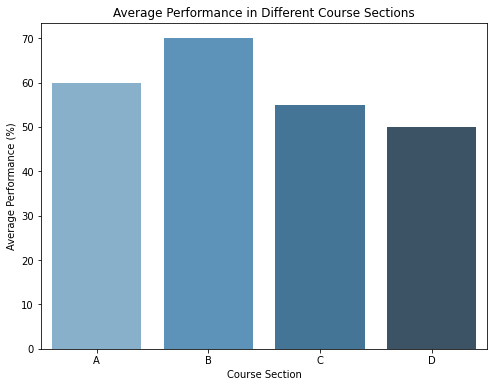

In [36]:
section_performance_data = {
    'Section': ['A', 'B', 'C', 'D'],
    'Average Performance': [60, 70, 55, 50]
}
section_performance_df = pd.DataFrame(section_performance_data)
def show(section_performance_df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Section', y='Average Performance', data=section_performance_df, palette="Blues_d")
    plt.title('Average Performance in Different Course Sections')
    plt.xlabel('Course Section')
    plt.ylabel('Average Performance (%)')
    plt.show()
show(section_performance_df)

## 2. **Data Cleaning:**
Data needs to be cleaned and formatted to remove inconsistencies. We suggest aligning your data structures with global standards. This not only ensures data quality but also enables easy integration of third-party data for more comprehensive analytics.
in some cases, there are issues with the values in terms of it being descriptive.

forexample look at the `Question Report` Column:


| ID  | Tags                 | Correct Answers | Time spent on question | Times students revisit | Discrimination Index | Item Difficulty Level |
|-----|----------------------|-----------------|------------------------|------------------------|----------------------|-----------------------|
| Q1  | 'Grammar'          | 7 out of 10     | 9.3333333333              | 0                | 0                  | 0                   |
| Q2  | 'Listening' | 5 out of 10 | 7.333333        | 1 time                 | 1                 | 1                   |
| Q3  | 'Reading'          | 9 out of 10     | 5              | 3 times                | 2.1213203435596424                  | 0.25                   |


This can be the cleaned version:

| ID  | Tags                 | Correct Answers | Time spent on question | Times students revisit | Discrimination Index | Item Difficulty Level |
|-----|----------------------|-----------------|------------------------|------------------------|----------------------|-----------------------|
| Q1  | 'Grammar'          | 7     | 123456 ms              | 0                | -1.00                  | 1                   |
| Q2  | 'Listening' | 5| 10000 ms        | 1                 | 0                 | 0                   |
| Q3  | 'Reading'          | 9     | 500 ms              | 3                | 1.00                  | 0.25                   |


## 3. **Potential Analytics and Their Importance**
Here, we gain a preliminary understanding of the data. For example: 

`average performance in different course sections (as you saw in the chart) can offer insights into overall course effectiveness.`

We can also see the data in diffrent views. For example analyzing the student performance one by one, or in coparison with other, can report different issues:

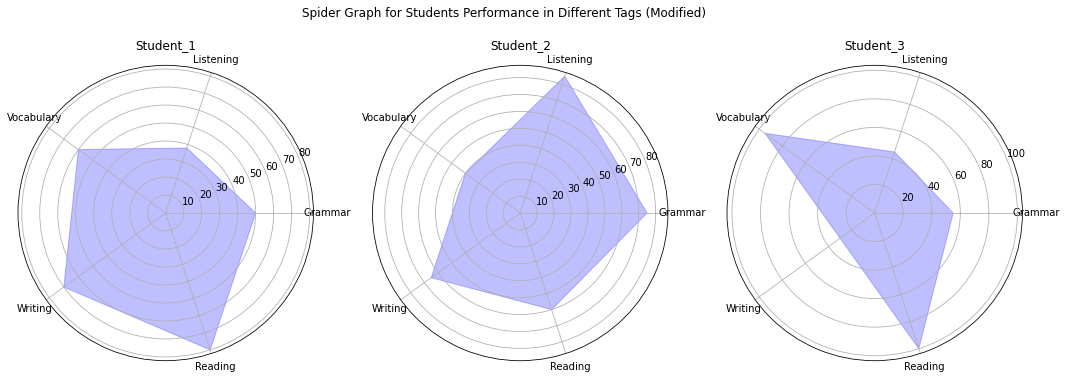

In [38]:
student_performance_data_modified = {
    'Student': ['Student_1', 'Student_2', 'Student_3'],
    'Grammar': [50, 75, 55],
    'Listening': [38, 85, 45],
    'Vocabulary': [60, 40, 95],
    'Writing': [70, 65, 30],
    'Reading': [80, 60, 100]
}
student_performance_df_modified = pd.DataFrame(student_performance_data_modified)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'polar': True})
fig.suptitle('Spider Graph for Students Performance in Different Tags (Modified)')
for i, ax in enumerate(axes):
    student = student_performance_df_modified.loc[i, 'Student']
    labels = student_performance_df_modified.columns[1:]
    stats = student_performance_df_modified.loc[i, labels].values
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    ax.fill(angles, stats, color='blue', alpha=0.25)
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.set_title(student)
plt.show()

In a single spider chart, you're looking at the performance metrics of a single student across various KPIs. This type of chart is excellent for:

- Individual assessment
- Tailoring educational strategies for a specific student
- Understanding the unique learning profile of a single student

##### Report:
- `Student_1: Shows a balanced profile but has room for improvement in "Listening".`
- `Student_2: Excels in "Listening" and "Grammar", but lags in "Vocabulary" and "Reading".`
- `Student_3: Performs exceptionally well in "Reading" and "Vocabulary" but needs attention in "Writing"`

In a combined spider chart, you overlay the metrics of multiple students on a single chart. This can offer:

- Quick comparison between students
- A general overview of class performance across different KPIs
- Identifying common strengths or weaknesses in a cohort


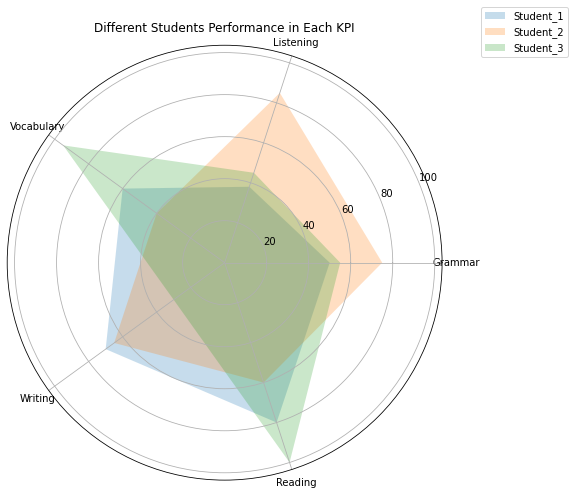

In [42]:
student_kpi_data = { 
    'Student': ['Student_1', 'Student_2', 'Student_3'], 
    'Grammar': [50, 75, 55], 
    'Listening': [38, 85, 45], 
    'Vocabulary': [60, 40, 95], 
    'Writing': [70, 65, 30], 
    'Reading': [80, 60, 100]
}   
student_kpi_df = pd.DataFrame(student_kpi_data)
labels = student_kpi_df.columns[1:]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for index, row in student_kpi_df.iterrows():
    stats = row[labels].values
    ax.fill(angles, stats, alpha=0.25, label=row['Student'])

ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title('Different Students Performance in Each KPI')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

Combining multiple students' performance metrics in a single chart like this provides a quick comparison. It can help educators identify which KPIs are generally strong or weak among the student body, thereby informing broader educational strategies.

##### Report:
- `Student_1: Balanced in most areas but could improve in "Listening".`
- `Student_2: Very strong in "Listening" but weaker in "Vocabulary" and "Reading".`
- `Student_3: Excelling in "Reading" and "Vocabulary" but needs improvement in "Writing".`


## 4. **Case Study:** Resource Effectiveness
In this step, we go into specific metrics that could be most impactful. The case study below illustrates this.

Your data shows varying performance metrics when different resources are used for teaching. For example, a change in resource led to a significant improvement in scores for the "Listening" tag, but a decline in "Vocabulary."


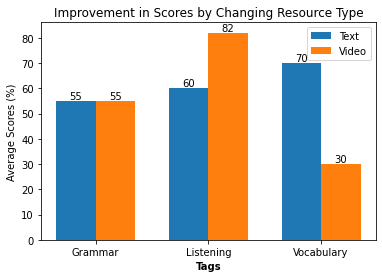

In [11]:
tags = ['Grammar', 'Listening', 'Vocabulary']
old_method_scores = [55, 60, 70]
new_method_scores = [55, 82, 30]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(tags))

bar1 = plt.bar(index, old_method_scores, bar_width, label='Text')
bar2 = plt.bar(index + bar_width, new_method_scores, bar_width, label='Video')

plt.xlabel('Tags', fontweight='bold')
plt.ylabel('Average Scores (%)')
plt.title('Improvement in Scores by Changing Resource Type')
plt.xticks(index + bar_width / 2, tags)

for i in range(len(bar1)):
    plt.text(bar1[i].get_x() + bar1[i].get_width() / 2.0, bar1[i].get_height(), str(old_method_scores[i]), ha='center', va='bottom')
    plt.text(bar2[i].get_x() + bar2[i].get_width() / 2.0, bar2[i].get_height(), str(new_method_scores[i]), ha='center', va='bottom')

plt.legend()
plt.show()

Most of the platforms just stop after visualizing the data by showing these metrics, but this is not the end of the analytics.
Actual analytics is about extracting a meaning out of this data...

##### Report:

1. **No Change in "Grammar" (55% in both methods)**

    `Meaning:`
    The resource change didn't impact the students' performance in "Grammar." It suggests that the resource might not be the limiting factor for this particular subject area.

    `Next Steps:`
    Investigate other potential variables like teaching methods, or the inherent difficulty of the subject matter.
    Perform A/B testing with a different set of resources or instructional techniques to see if any improvement can be made.


2. **Significant Improvement in "Listening" (from 60% to 82%)**

    `Meaning:`
    A marked improvement signifies that the new resource was particularly effective for teaching "Listening." It indicates a strong correlation between the resource type and student performance in this area.

    `Next Steps:`
    Consider rolling out this new resource more broadly across other sections or courses where "Listening" is a key component.
    Conduct a deeper analysis to understand what specific aspects of the new resource contributed to the improvement.

#

3. **A Decline in "Vocabulary" (from 70% to 30%)**

    `Meaning:`
    The sharp decline indicates that the new resource was not effective and actually hampered performance in "Vocabulary." This could be due to the resource's quality, or it may not align well with the teaching method or curriculum.

    `Next Steps:`
    Immediately revert to the old resource for "Vocabulary" while investigating what went wrong.
    Run focus groups or surveys to understand from students what specific aspects of the new resource made it less effective.

## 5. **Value Proposition:** AI-Driven Analytics

The insights and recommendations presented in the previous sections are not just data visualizations; they are meaningful analyses generated through advanced AI analytics. This data-driven approach can significantly enhance both the teaching and learning experiences, providing a more personalized and effective educational journey.

Our next step involves designing superior algorithms that can cross-examine various data types across your platform. By doing so, we can identify new parameters that can be the cornerstone of future analytics.

One of our illustrative examples, the heatmap titled "Relation Between Study Source Type and KPI Performance of Learning," showcased the potential of cross-examination between different data sources and learning KPIs.

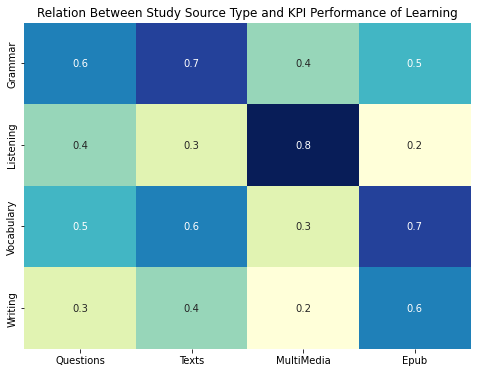

In [18]:
study_source_kpi_data = {
    'Questions': [0.6, 0.4, 0.5, 0.3],
    'Texts': [0.7, 0.3, 0.6, 0.4],
    'MultiMedia': [0.4, 0.8, 0.3, 0.2],
    'Epub': [0.5, 0.2, 0.7, 0.6]
}

study_source_kpi_df = pd.DataFrame(study_source_kpi_data, index=['Grammar', 'Listening', 'Vocabulary', 'Writing'])

plt.figure(figsize=(8, 6))
sns.heatmap(study_source_kpi_df, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Relation Between Study Source Type and KPI Performance of Learning')
plt.show()

#### **Data Reliability**

You've heard the saying, "Garbage in, garbage out." The quality of analysis is directly related to the quality of the data fed into the system. While a data-driven approach can revolutionize education, it's essential to ensure that the data itself is reliable.

Your platform collects a good amount of data from users behaiviour in different parts of the platform.
Here's a snapshot of the types of data we collect for each question and user:


**Question Database**


| Tag        | Correct Answers   | Time spent on question   | Times students revisit   | `Discrimination Index` | Item Difficulty Level |
|------------|-------------------|--------------------------|--------------------------|----------------------|-----------------------|
| Grammar    | 7 out of 10       | 2 minutes                | 2 times                  | `0.5`                  | 0.3                   |
| Listening  | 5 out of 10       | 3 minutes                | 1 time                   | `-0.2`                 | 0.5                   |
| Vocabulary | 9 out of 10       | 1 minute                 | 3 times                  | `0.7`                  | 0.1                   |


While metrics like the `Discrimination Index` provide insights into a student's confidence in their answers, ensuring the honesty of such metrics is crucial for effective analysis.

We utilize AI algorithms to analyze various parameters, such as clicks, mouse movements, and time spent on questions. Based on this analysis, the AI recognizes the user's answering pattern and categorizes it as `Focused` , `Random`, or `Mixed`

**User Data**

| Tag        | Avg Performance   | Frequency   | Consciously competent | Unconsciously competent | Consciously incompetent | Unconsciously incompetent | `AI Recognized Pattern` |
|------------|-------------------|-------------|-----------------------|-------------------------|-------------------------|---------------------------|-----------------------|
| Grammar    | 80%               | High        | 0.6                   | 0.2                     | 0.1                     | 0.1                        | `Focused`               |
| Listening  | 60%               | Medium      | 0.4                   | 0.3                     | 0.2                     | 0.1                        | `Random`                |
| Vocabulary | 90%               | Low         | 0.7                   | 0.1                     | 0.1                     | 0.1                        | `Mixed`                 |


For instance, let's consider the Grammar tag. The Discrimination Index stands at 0.5, indicating a moderate level of confidence from the students in their answers. Simultaneously, our AI algorithm tags the answering pattern for the user dealing with Grammar questions as 'Focused.' This dual verification ensures that we can consider the Discrimination Index as a reliable metric, confirming the students' confidence level and focusing on the quiz.

By implementing such a sophisticated system, we enhance the reliability of our data, making our analytics not just data-rich but also data-wise. This paves the way for more accurate and effective educational strategies.

#### **Beyond Educational Metrics**

Moreover, many of the metrics we gather—like mouse movements—aren't just valuable for educational analytics but can also be pivotal in other areas such as UI/UX design.

Consider user metrics like mouse movements or click patterns. By analyzing this data, we can understand user behavior and preferences, thereby informing UI/UX improvements. Imagine a dashboard where buttons or features used most frequently are placed in more accessible locations, making the platform more user-friendly and intuitive.